# I. Algorithm

## 1. Mathematics

### Norms:
$$||\mathbf{x}||_p = (|x_1|^p + |x_2|^p + \dots |x_n|^p)^{\frac{1}{p}}$$

Note:

__Manhattan distance__ ($p = 1$):
$$||\mathbf{z} - \mathbf{x_i}||_1 = ||\mathbf{z}||_1 - ||\mathbf{x_i}||_1(1)$$
__Euclidean distance__ ($p = 2$):
$$||\mathbf{z} - \mathbf{x_i}||_2^2 = (\mathbf{z} - \mathbf{x_i})^T(\mathbf{z} - \mathbf{x_i}) = ||\mathbf{z}||_2^2 + ||\mathbf{x_i}||_2^2 - 2||\mathbf{x_i}||^T||\mathbf{z}||(2)$$
- The formula is squared to avoid calculate square root.  

### Core, Border and Noise:
- __Core points:__ are points inside of the cluster.  
- __Border points:__ are points on the border of the cluster.  
- __Outlier:__ data points that are not in any cluster.
![](core-border-noise.png)

### Desity Relationships:
- __Directly density reachable:__ a point $p$ is directly density-reachable from a point $q$ w.r.t. $Eps$ and $MinPts$ if $p$ belongs to $q$'s neighborhood and q is a core point.
- __Density reachable:__ a point $p$ is density reachable from a point $q$ w.r.t. $Eps$ and $MinPts$ if there is a chain of points $p_1$, ..., $p_n$, $p_1= q$, $p_n = p$, such that $p_i+1$ is directly density reachable from $p_i$.
- __Density connected:__ a point $p$ is density-connected to a point $q$ w.r.t. $Eps$ and $MinPts$, if there is a point $o$ such that both $p$ and $q$ are density reachable from $o$ w.r.t. $Eps$ and $MinPts$.
![](desity-relationship.jpg)

## 2. Code

- Step 1: Calculate distance between points in data.
- Step 2: Get all the core points and its neighbors' index inside $\text{eps}$.
- Step 3: Use recursive algorithm to connect the point with its neighbor inside $\text{eps}$:
    - Base case: if the neighbor is border, stop the algorithm.
    - Recursive case: if the neighbor is core, apply the algorithm on that neighbor.

In [1]:
import numpy as np
class DBScan(object):
    def __init__(self, eps, min_samples):
        self.X = np.array([])
        self.labels = np.array([])
        self.eps = eps
        self.min_samples = min_samples
        self.distance = np.array([])
        self.core_index = {}
        
    def fit(self, X):
        self.X = X
    
    # Step 1: Calculate distance between points in data
    def calculate_distance(self):
        X2 = np.sum(self.X*self.X, 1)
        self.distance = X2.reshape(1, -1) + X2.reshape(-1, 1) - 2*self.X.dot(self.X.T)

    # Step 2: Get all the core points and its neighbors inside eps
    def get_core_and_neighbors(self):
        # Count the total neighbors inside eps of each point      
        neighbors = np.zeros(self.distance.shape)
        neighbors[self.distance < self.eps] = 1
        np.fill_diagonal(neighbors, 0)
        count = np.sum(neighbors, axis = 1)
        # Get core 
        core = np.argwhere(count > min_neighbors + 1)
        core = core.reshape(-1).tolist()
        # Get core neighbors
        neighbors = neighbors[count > min_neighbors + 1, :]
        index = []
        for i in range(neighbors.shape[0]):
            index.append(np.argwhere(neighbors[i] == 1).reshape(-1).tolist())
        # Return dictionary with core and its neighbors
        self.core_index = dict(zip(core, index)) 

    # Step 3: Use recursive algorithm to connect the point with its neighbor inside eps 
    def label_row(self, row, cluster, core):
        self.labels[row] = cluster
        if row in core:
            core.remove(row)
            for i in self.core_index.get(row):
                self.label_row(i, cluster, core)      
    # Run a for loop through all steps     
    def predict(self):
        self.calculate_distance()
        self.get_core_and_neighbors()
        self.labels = np.zeros(self.X.shape[0])
        core = list(self.core_index.keys())
        cluster = 1
        while len(core) != 0:
            row = core[0]
            self.label_row(row, cluster, core)
            cluster += 1
        return self.labels

# II. Practice

Seperate 2 circular clusters.

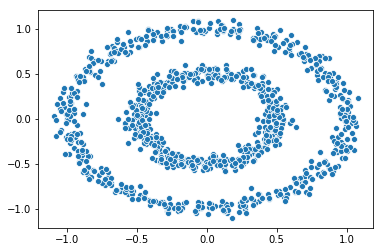

In [4]:
# Create data
from sklearn import datasets
X = datasets.make_circles(n_samples=1000, factor=.5, noise=0.05)[0]

# Plot data
import seaborn as sns
sns.scatterplot(x = X[:,0], y=X[:,1])

In [6]:
eps = 0.02
min_neighbors = 15
model = DBScan(eps, min_neighbors)
model.fit(X)
labels = model.predict()

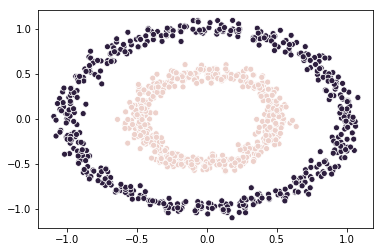

In [10]:
# Plot model
sns.scatterplot(x = X[:,0], y = X[:,1], hue = labels, legend = False)

# III. References

Wikipedia - DBSCAN [https://en.wikipedia.org/wiki/DBSCAN]